In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../../src/')
# import toolbox
from toolbox import *
from copulae1 import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

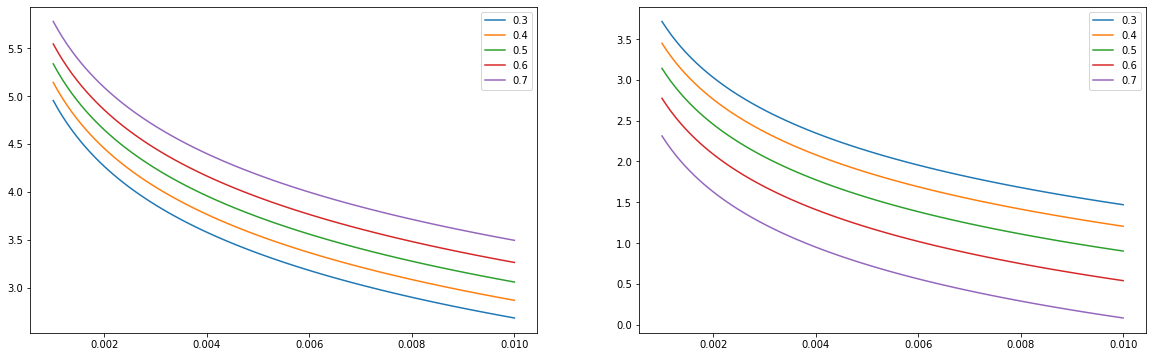

In [65]:
rho_arr = [0.3,0.4,0.5,0.6,0.7]

diagonal_outer = []
off_diagonal_outer = []

for rho in rho_arr:
    C = t_Copula({'rho':rho, 'nu':2}, stats.uniform, stats.uniform, nu_lowerbound=2)

    u_arr = np.linspace(0.001,0.01,100)
    diagonal = []
    off_diagonal = []
    for u in u_arr:
        diagonal.append(C.c(u,u))
        off_diagonal.append(C.c(1-u,u))
        
    diagonal_outer.append(diagonal)
    off_diagonal_outer.append(off_diagonal)
    

fig, ax = plt.subplots(1,2, figsize=(20,6))

for i in range(len(diagonal_outer)):
    ax[0].plot(u_arr, np.log(diagonal_outer[i]), label=rho_arr[i])
    ax[1].plot(u_arr, np.log(off_diagonal_outer[i]), label=rho_arr[i])
    ax[0].legend()
    ax[1].legend()

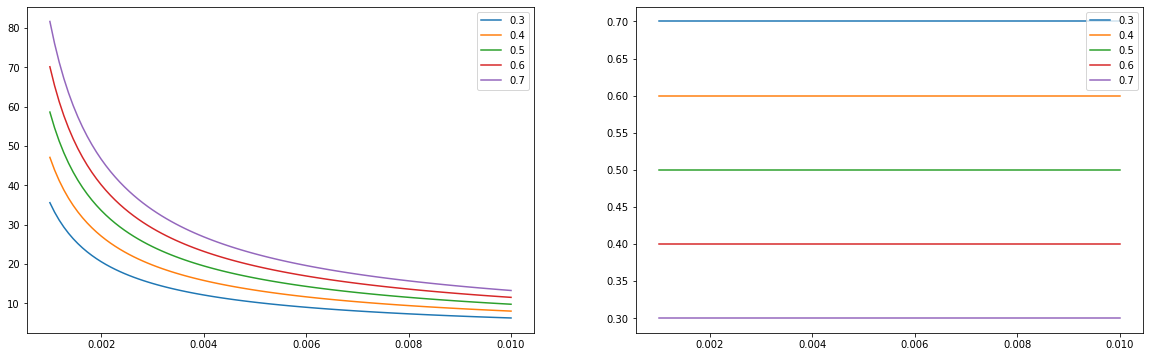

In [68]:
p_arr = [0.3,0.4,0.5,0.6,0.7]
rho = 0.8
diagonal_outer = []
off_diagonal_outer = []

for p in p_arr:
    C = Gaussian_Mix_Independent({'rho':rho, 'p':p}, stats.uniform, stats.uniform)

    u_arr = np.linspace(0.001,0.01,100)
    diagonal = []
    off_diagonal = []
    for u in u_arr:
        diagonal.append(C.c(u,u))
        off_diagonal.append(C.c(1-u,u))
        
    diagonal_outer.append(diagonal)
    off_diagonal_outer.append(off_diagonal)
    

fig, ax = plt.subplots(1,2, figsize=(20,6))

for i in range(len(diagonal_outer)):
    ax[0].plot(u_arr, (diagonal_outer[i]), label=p_arr[i])
    ax[1].plot(u_arr, (off_diagonal_outer[i]), label=p_arr[i])
    ax[0].legend()
    ax[1].legend()

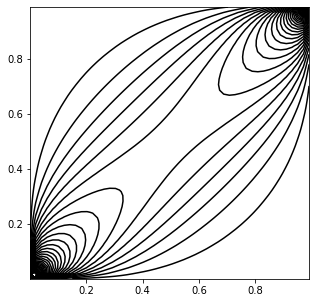

In [73]:
# C = t_Copula({'rho':0.3, 'nu':2}, stats.uniform, stats.uniform, nu_lowerbound=2)
C = Gaussian_Mix_Independent({'rho':0.8, 'p':0.9}, stats.uniform, stats.uniform)

x = np.linspace(0.001,.99, 50)
y = np.linspace(0.001,.99, 50)
X, Y = np.meshgrid(x, y)

Z = np.vectorize(C.c)(X,Y)

plt.figure(figsize=(5,5))
plt.contour(X, Y, Z, 500, colors='black');

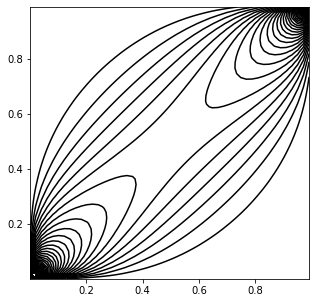

In [72]:
# C = t_Copula({'rho':0.7, 'nu':5}, stats.uniform, stats.uniform, nu_lowerbound=2)
C = Gaussian_Mix_Independent({'rho':0.8, 'p':0.2}, stats.uniform, stats.uniform)

x = np.linspace(0.001,.99, 50)
y = np.linspace(0.001,.99, 50)
X, Y = np.meshgrid(x, y)

Z = np.vectorize(C.c)(X,Y)

plt.figure(figsize=(5,5))
plt.contour(X, Y, Z, 500, colors='black');